In [114]:
import numpy as np
import matplotlib.pyplot as plt
import gravhydro as gh
import astropy.units as u
import astropy.constants as c

In [143]:

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['font.size'] = 12.5
plt.rcParams['axes.labelsize'] = 14
plt.rcParams["text.usetex"] = False
plt.rcParams["mathtext.fontset"] = "stix"

In [115]:
# Jeans mass
def MJ(density, cs):
    return cs**3 / np.sqrt(c.G**3 * density)

Total particles: 400
Particle spacing: dx=0.1053, dy=0.1053


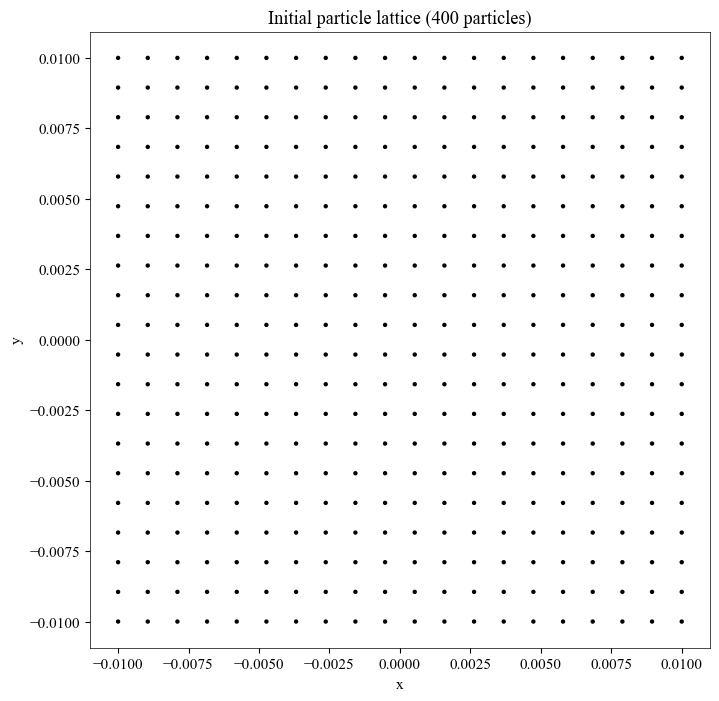

In [116]:
# === 2D SQUARE LATTICE SETUP ===
# Uniform grid of particles - this is a stable equilibrium configuration
nx = 20
ny = 20
x_min, x_max = -1, 1
y_min, y_max = -1, 1

xs = np.linspace(x_min, x_max, nx)
ys = np.linspace(y_min, y_max, ny)
xx, yy = np.meshgrid(xs, ys)
pos = np.zeros((nx * ny, 3)) * u.kpc
pos[:, :2] = np.vstack([xx.ravel(), yy.ravel()]).T * 10 * u.pc
actual_N = len(pos)

# Particle spacing
dx = xs[1] - xs[0]
dy = ys[1] - ys[0]
print(f"Total particles: {actual_N}")
print(f"Particle spacing: dx={dx:.4f}, dy={dy:.4f}")

# quick visual check
plt.figure(figsize=(8, 8))
plt.scatter(pos[:, 0], pos[:, 1], s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Initial particle lattice ({actual_N} particles)')
plt.axis('equal')
plt.show()

In [117]:
# # Add a smaller grid of particles in the central region
# # Higher resolution in the center
# nx_center = 10
# ny_center = 10
# x_center_min, x_center_max = -0.3, 0.3
# y_center_min, y_center_max = -0.3, 0.3

# xs_center = np.linspace(x_center_min, x_center_max, nx_center)
# ys_center = np.linspace(y_center_min, y_center_max, ny_center)
# xx_center, yy_center = np.meshgrid(xs_center, ys_center)
# pos_center = np.vstack([xx_center.ravel(), yy_center.ravel()]).T * 10 * u.pc

# # Combine with original grid
# pos_combined = np.zeros((len(pos) + len(pos_center), 3)) * u.kpc
# pos_combined[:len(pos), :] = pos
# pos_combined[len(pos):, :2] = pos_center
# pos_combined[len(pos):, 2] = 0 * u.kpc

# # Update pos to include central particles
# pos = pos_combined
# actual_N = len(pos)

# # Particle spacing in central region
# dx_center = xs_center[1] - xs_center[0]
# dy_center = ys_center[1] - ys_center[0]
# print(f"Total particles: {actual_N} ({len(pos)-len(pos_center)} original + {len(pos_center)} central)")
# print(f"Central region spacing: dx={dx_center:.4f}, dy={dy_center:.4f}")

# # Visualize combined grid
# plt.figure(figsize=(8, 8))
# plt.scatter(pos[:len(pos)-len(pos_center), 0], pos[:len(pos)-len(pos_center), 1], s=10, alpha=0.5, label='Original grid')
# plt.scatter(pos[len(pos)-len(pos_center):, 0], pos[len(pos)-len(pos_center):, 1], s=20, c='red', label='Central grid')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title(f'Combined particle lattice ({actual_N} particles)')
# plt.legend()
# plt.axis('equal')
# plt.show()

# Dark Matter

In [118]:
vel = np.zeros_like(pos).value * u.km/u.s

In [119]:
sim = gh.Simulation()
masses = np.ones_like(pos[:,0]).value * u.Msun * 100

In [120]:
ts = np.linspace(0, 10, 800) * u.Myr

In [121]:
vel

<Quantity [[0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.],
           ...,
           [0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.]] km / s>

In [124]:
sim.run(pos, vel, masses, ts, gravityMethod='directSummation', use_numba=True, gravityOnly=False, hydroOnly=True, unitLength=1 * u.kpc, h= 1 * u.pc, cs=2)

100%|██████████| 799/799 [00:02<00:00, 317.77it/s]


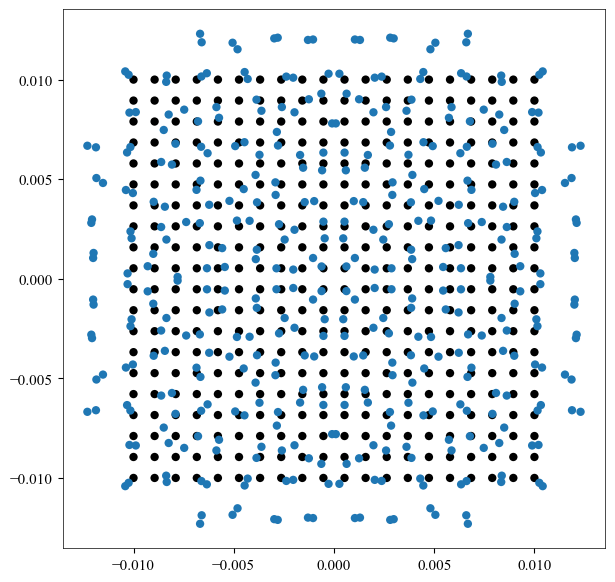

In [125]:
i = -1
plt.figure(figsize=(7,7))
plt.scatter(sim.positions[0, :,0], sim.positions[0, :,1])
plt.scatter(sim.positions[i, :,0], sim.positions[i, :,1])
# plt.xlim(-0.01, 0.01)
# plt.ylim(-0.01, 0.01)

In [126]:
sim.velocities.shape

(800, 400, 3)

In [138]:
vel_mags = np.linalg.norm(sim.velocities, axis=-1)
xmomentum = 0.5 * masses * sim.velocities[..., 0]
ymomentum = 0.5 * masses * sim.velocities[..., 1]

In [139]:
total_xmomentum = np.sum(xmomentum, axis=-1)
total_ymomentum = np.sum(ymomentum, axis=-1)

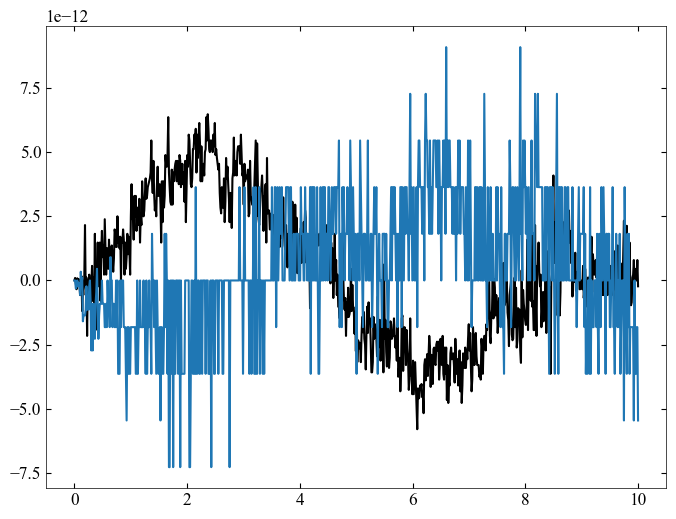

In [144]:
plt.plot(ts, total_xmomentum)
plt.plot(ts, total_ymomentum)

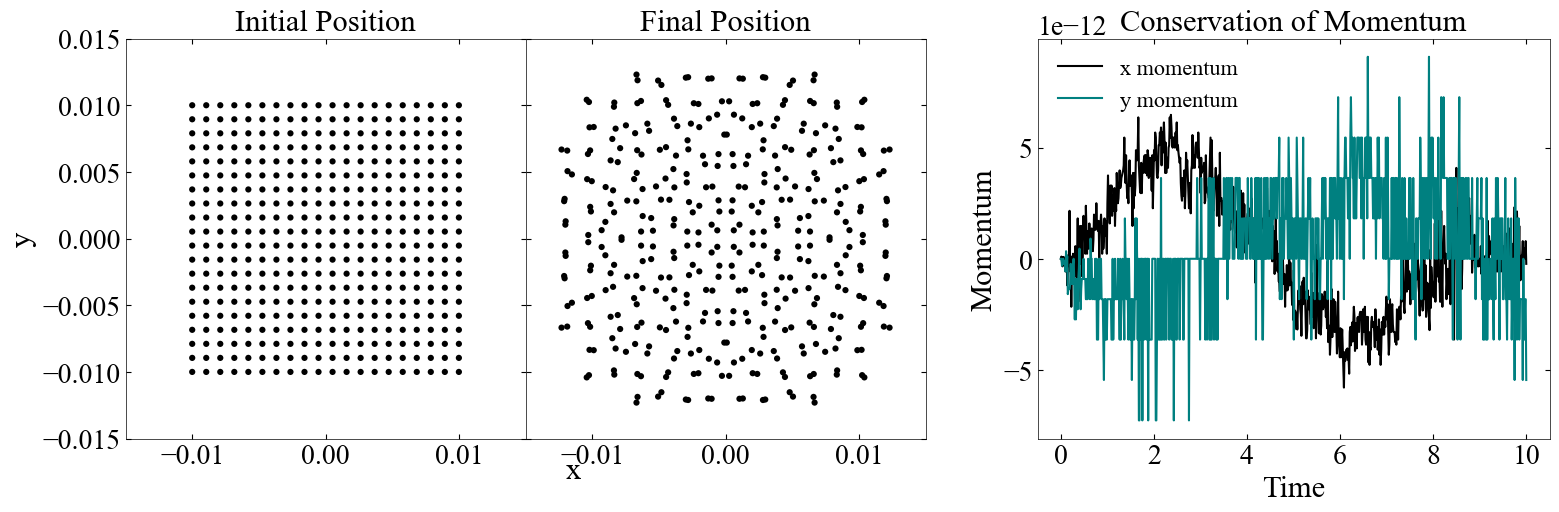

In [178]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Initial position
axes[0].scatter(sim.positions[0, :, 0], sim.positions[0, :, 1], s=20)
axes[0].set_ylabel('y', fontsize=22)
axes[0].set_title('Initial Position', fontsize=22)
axes[0].set_aspect('equal')
axes[0].tick_params(axis='both', labelsize=20)

# Final position
axes[1].scatter(sim.positions[-1, :, 0], sim.positions[-1, :, 1], s=20)
axes[1].set_title('Final Position', fontsize=22)
axes[1].set_aspect('equal')
axes[1].set_yticklabels([])
axes[1].tick_params(axis='both', labelsize=20)
axes[0].set_xlim(-0.015, 0.015)
axes[0].set_ylim(-0.015, 0.015)
axes[1].set_xlim(-0.015, 0.015)
axes[1].set_ylim(-0.015, 0.015)


# Shared x label for first two subplots
fig.text(0.33, 0.02, 'x', ha='center', fontsize=22)

# Momentum vs time
axes[2].plot(ts, total_xmomentum, label='x momentum', c='k')
axes[2].plot(ts, total_ymomentum, label='y momentum', c='teal')
axes[2].set_xlabel('Time', fontsize=22)
axes[2].set_ylabel('Momentum', fontsize=22)
axes[2].set_title('Conservation of Momentum', fontsize=22)
axes[2].legend(fontsize=16, frameon=False)
axes[2].tick_params(axis='both', labelsize=20)
axes[2].yaxis.get_offset_text().set_fontsize(20)

# Remove spacing between first two subplots
plt.subplots_adjust(wspace=0.3)
fig.subplots_adjust(wspace=0)
axes[0].set_position([0.05, 0.1, 0.25, 0.8])
axes[1].set_position([0.30, 0.1, 0.25, 0.8])
axes[2].set_position([0.62, 0.1, 0.32, 0.8])
plt.savefig('conservation_of_momentum_hydro.png', dpi=300, bbox_inches='tight')
plt.show()


In [136]:
total_momentum = np.sum(momentum, axis=-1)

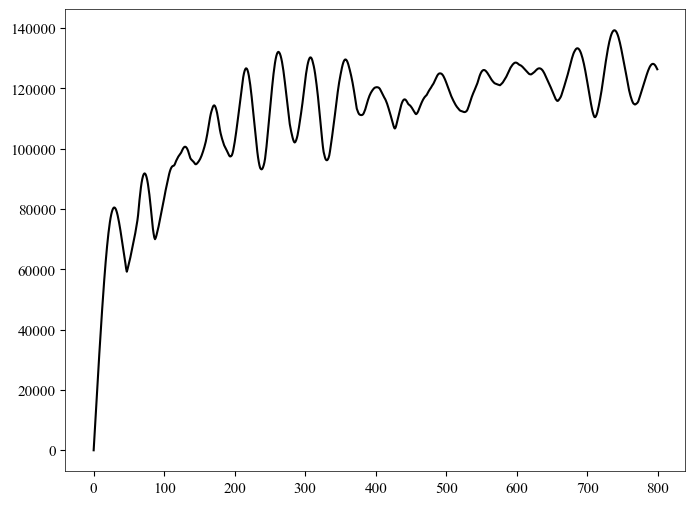

In [137]:
plt.plot(total_momentum)

In [94]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(7, 7))

def update(frame):
    ax.clear()
    #ax.scatter(sim.positions[0, :, 0], sim.positions[0, :, 1], alpha=0.5, label='Initial')
    ax.scatter(sim.positions[frame*10, :, 0], sim.positions[frame*10, :, 1], alpha=0.75, label=f'Frame {frame*10}')
    ax.set_xlim(-0.02, 0.02)
    ax.set_ylim(-0.02, 0.02)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Particle Positions - Timestep {frame}/{len(sim.positions)-1}')

anim = FuncAnimation(fig, update, frames=len(sim.positions)//10, interval=100, repeat=True)
plt.close()
HTML(anim.to_jshtml())